In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

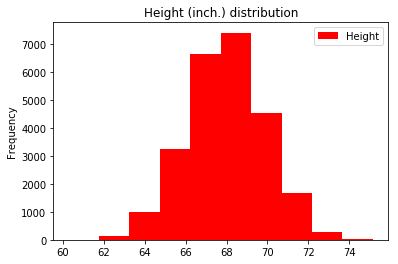

In [3]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

In [4]:
data.head(n = 5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


## Гистограмма (п.2)

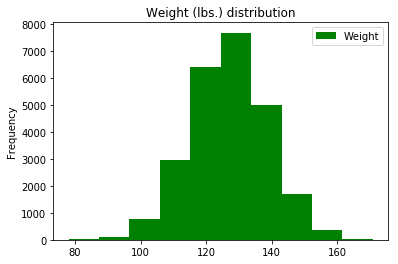

In [5]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (lbs.) distribution')

In [6]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [7]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

## Попарные зависимости признаков (п.3)

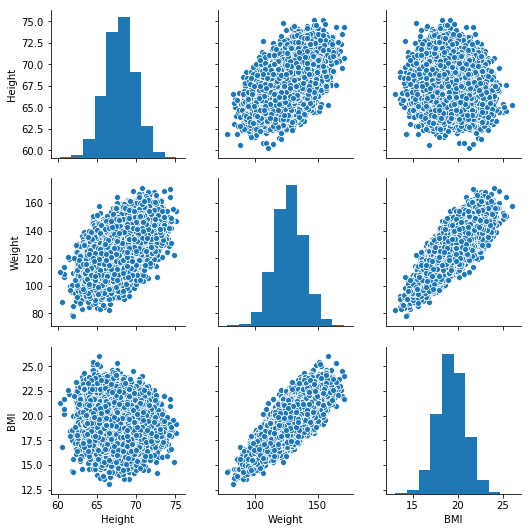

In [8]:
sns.pairplot(data)

## Зависимость роста от весовой категории (п.4)

[Text(0,0.5,'Height, inch'), Text(0.5,0,'Weight category')]

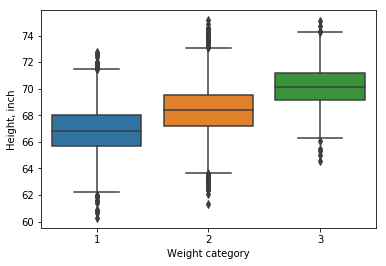

In [9]:
def weight_category(weight):
    if (weight < 120):
        return 1
    if (weight < 150):
        return 2
    return 3
    
data['weight_cat'] = data['Weight'].apply(weight_category)

sns.boxplot(y='Height',x='weight_cat',data=data).set(xlabel='Weight category', ylabel='Height, inch')

## Scatter plot роста от веса (п.5)

[Text(0,0.5,'Height, inch'),
 Text(0.5,0,'Weight, lbs'),
 Text(0.5,1,'Height/Weight distribution scatter plot')]

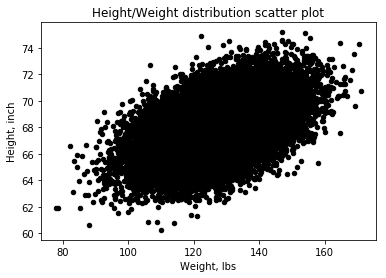

In [10]:
data.plot(y = 'Height', x = 'Weight', kind='scatter', color = 'black').set(
    title = 'Height/Weight distribution scatter plot', xlabel='Weight, lbs', ylabel='Height, inch')

## Функция подсчета квадратичной ошибки (п. 6)

In [11]:
def err(w0, w1):
    sum = 0
    for i in data.index:
        x = data.loc[i,'Weight']
        y = data.loc[i,'Height']       
        sum += ((y - (w0 + w1 * x)) ** 2)
    return sum

## Рисуем на scatter plot (п. 7)

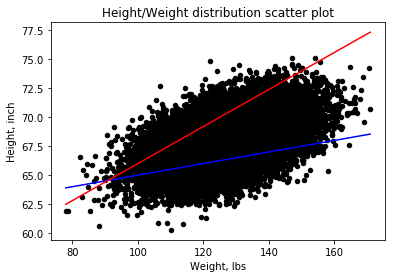

In [12]:
data.plot(y = 'Height', x = 'Weight', kind='scatter', color = 'black').set(
    title = 'Height/Weight distribution scatter plot', xlabel='Weight, lbs', ylabel='Height, inch')

x_min = min(data.loc[:,'Weight']) 
x_max = max(data.loc[:,'Weight']) 

plot_x1 = np.linspace(x_min, x_max, 100)
plot_x2 = plot_x1

plot_y1 = 60 + 0.05 * plot_x1
plot_y2 = 50 + 0.16 * plot_x2

plt.plot(plot_x1, plot_y1, color = 'blue')
plt.plot(plot_x2, plot_y2, color = 'red')

## График функции ошибки (п. 8)

Text(0.5,1,'Error function from parameter w1; w0 fixed at 50')

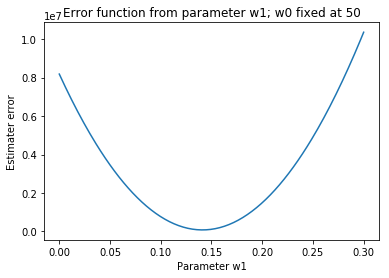

In [13]:
plot2_x = np.linspace(0, 0.3, 200)
plot2_y = err(50, plot2_x)

plt.plot(plot2_x, plot2_y)
plt.xlabel('Parameter w1')
plt.ylabel('Estimater error')
plt.title('Error function from parameter w1; w0 fixed at 50')

## Minimize для 1 аргумента (п. 9)

In [14]:
w1_opt = scipy.optimize.minimize_scalar(lambda w1: err(50,w1),bounds=(-5,5)).x

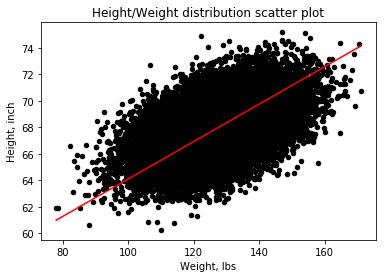

In [15]:
data.plot(y = 'Height', x = 'Weight', kind='scatter', color = 'black').set(
    title = 'Height/Weight distribution scatter plot', xlabel='Weight, lbs', ylabel='Height, inch')

plot3_x = np.linspace(x_min, x_max, 100)

plot3_y = 50 + w1_opt * plot3_x

plt.plot(plot3_x, plot3_y, color = 'red')

In [16]:
from mpl_toolkits.mplot3d import Axes3D

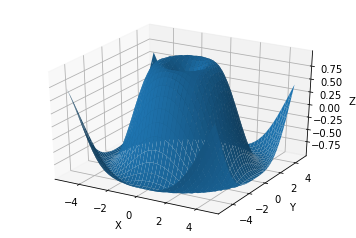

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## 3D-график функции ошибок от параметров (п.10)

Text(0.5,0,'Error')

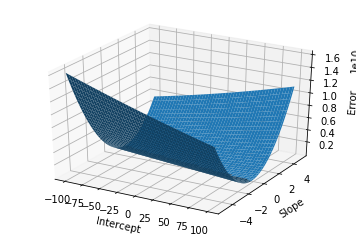

In [18]:
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')

x4 = np.linspace(-100, 100, 100)
y4 = np.linspace(-5, 5, 50)
x4, y4 = np.meshgrid(x4, y4)

z4 = err(x4, y4)

surf2 = ax2.plot_surface(x4, y4, z4)
ax2.set_xlabel('Intercept')
ax2.set_ylabel('Slope')
ax2.set_zlabel('Error')

## Minimize для 2 аргументов - финальный результат (п. 11)

In [19]:
def err_arr(x):   
    return err(x[0], x[1])

#дикий костыль, но не очень понятно, как по-другому воспользоваться optimize

In [20]:
func_3d = scipy.optimize.minimize(err_arr, [0,0], bounds=[(-100,100),(-5,5)],method='L-BFGS-B')

In [21]:
func_3d.x

array([57.57193465,  0.08200525])

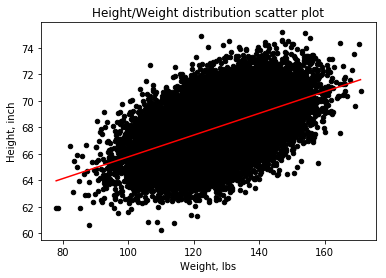

In [23]:
data.plot(y = 'Height', x = 'Weight', kind='scatter', color = 'black').set(
    title = 'Height/Weight distribution scatter plot', xlabel='Weight, lbs', ylabel='Height, inch')

plot5_x = np.linspace(x_min, x_max, 100)

plot5_y = func_3d.x[0] + func_3d.x[1] * plot5_x

plt.plot(plot5_x, plot5_y, color = 'red')